# Visualize samples for NGC 4047 in galactocentric radius and angle.

In [1]:
import matplotlib.pyplot as plt
from edge_pydb import EdgeTable
from edge_pydb.conversion import gc_polr
from edge_pydb.plotting import dotpatch
import numpy as np
from astropy import units as u

## Read the observational values

In [2]:
# Here we forget to specify the path for an HDF5 file so it gives us a list of options and exits
cotab = EdgeTable('NGC4047.2d_smo7.hdf5')
cotab

Paths in NGC4047.2d_smo7.hdf5 :
 ['ELINES_sm', 'SFH_sm', 'SSP_sm', 'comom_dil', 'comom_smo', 'comom_str', 'flux_elines_sm', 'indices_sm']


<EdgeTable length=0>
<No columns>

In [3]:
# Image data (CO mom0 image)
cotab = EdgeTable('NGC4047.2d_smo7.hdf5', path='comom_smo')
cotab

Name,ix,iy,ra_abs,dec_abs,ra_off,dec_off,rad_arc,azi_ang,mom0_12,e_mom0_12,mom1_12,e_mom1_12,mom2_12,e_mom2_12,sigmol,e_sigmol,cosi,mom0_13,e_mom0_13,mom1_13,e_mom1_13,mom2_13,e_mom2_13
,,,deg,deg,deg,deg,arcsec,deg,K km / s,K km / s,km / s,km / s,km / s,km / s,solMass / pc2,solMass / pc2,,K km / s,K km / s,km / s,km / s,km / s,km / s
bytes7,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
NGC4047,1,1,180.737717,48.618690,0.026472,-0.017503,100.105,42.997,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan
NGC4047,1,4,180.737717,48.619526,0.026473,-0.016670,97.079,41.505,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan
NGC4047,1,7,180.737717,48.620358,0.026473,-0.015836,94.123,39.919,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan
NGC4047,1,10,180.737717,48.621193,0.026474,-0.015003,91.243,38.231,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan
NGC4047,1,13,180.737717,48.622025,0.026474,-0.014170,88.448,36.435,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan
NGC4047,1,16,180.737732,48.622860,0.026475,-0.013336,85.746,34.524,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan
NGC4047,1,19,180.737732,48.623692,0.026475,-0.012503,83.145,32.491,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan
NGC4047,1,22,180.737732,48.624523,0.026475,-0.011670,80.655,30.329,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan


In [4]:
# Ctr pos, PA, Inc from LEDA.  Note that RA is given in hours not degrees.
leda  = EdgeTable('edge_leda.csv', cols=['Name', 'ledaRA', 'ledaDE', 'ledaPA', 'ledaAxIncl'])
leda['ledaRA'].convert_unit_to('deg')
cotab.join(leda)

In [5]:
# PA, Inc, and ctr pos from Becca's table.  Note that RA is given in hours not degrees.
rftab  = EdgeTable('edge_rfpars.csv', cols=['Name', 'rfPA', 'rfInc', 'rfKinRA', 'rfKinDecl'])
rftab['rfKinRA'].convert_unit_to('deg')
cotab.join(rftab)
cotab

Name,ix,iy,ra_abs,dec_abs,ra_off,dec_off,rad_arc,azi_ang,mom0_12,e_mom0_12,mom1_12,e_mom1_12,mom2_12,e_mom2_12,sigmol,e_sigmol,cosi,mom0_13,e_mom0_13,mom1_13,e_mom1_13,mom2_13,e_mom2_13,ledaRA,ledaDE,ledaPA,ledaAxIncl,rfPA,rfInc,rfKinRA,rfKinDecl
,,,deg,deg,deg,deg,arcsec,deg,K km / s,K km / s,km / s,km / s,km / s,km / s,solMass / pc2,solMass / pc2,,K km / s,K km / s,km / s,km / s,km / s,km / s,deg,deg,deg,deg,deg,deg,deg,deg
str13,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64
NGC4047,1,118,180.737732,48.651192,0.026489,0.014997,100.395,-58.027,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,1,115,180.737732,48.650356,0.026489,0.014164,97.363,-56.544,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,1,112,180.737732,48.649525,0.026489,0.013330,94.400,-54.967,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,1,109,180.737732,48.648693,0.026488,0.012497,91.513,-53.290,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,1,106,180.737732,48.647858,0.026488,0.011664,88.709,-51.504,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,1,94,180.737732,48.644524,0.026486,0.008330,78.506,-43.151,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,1,100,180.737732,48.646191,0.026487,0.009997,83.387,-47.583,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,1,97,180.737732,48.645359,0.026486,0.009164,80.886,-45.434,nan,nan,nan,nan,nan,nan,nan,nan,0.75126415,nan,nan,nan,nan,nan,nan,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246


## Re-calculate polar coordinates in galaxy plane, using Levy+18 fits for center position, PA and INC.

In [6]:
rarc, azdeg = gc_polr(cotab['ra_abs'], cotab['dec_abs'], cotab['rfKinRA'], 
                      cotab['rfKinDecl'], cotab['rfPA'], cotab['rfInc'])

## Produce the dot plots

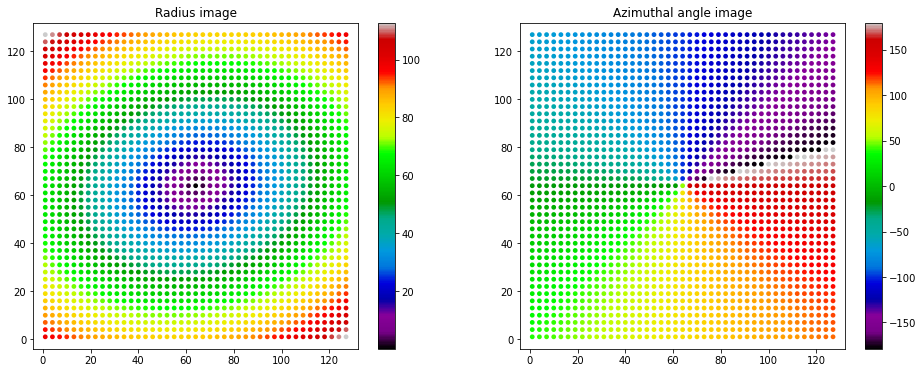

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

patch, xlims, ylims = dotpatch(cotab['ix'], cotab['iy'], rarc, axes=ax1, cmap='nipy_spectral')
ax1.set_title('Radius image')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
plt.colorbar(patch, ax=ax1)

patch, xlims, ylims = dotpatch(cotab['ix'], cotab['iy'], azdeg, axes=ax2, cmap='nipy_spectral')
ax2.set_title('Azimuthal angle image')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
plt.colorbar(patch, ax=ax2)

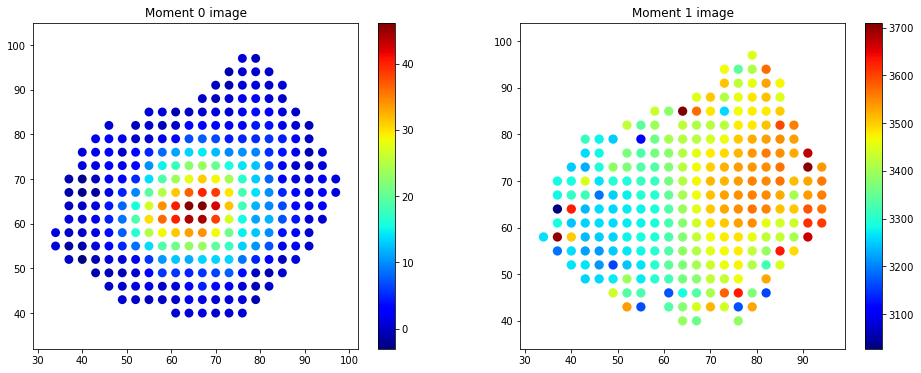

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

patch, xlims, ylims = dotpatch(cotab['ix'], cotab['iy'], cotab['mom0_12'], axes=ax1, cmap='jet')
ax1.set_title('Moment 0 image')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
plt.colorbar(patch, ax=ax1)

patch, xlims, ylims = dotpatch(cotab['ix'], cotab['iy'], cotab['mom1_12'], axes=ax2, cmap='jet')
ax2.set_title('Moment 1 image')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
plt.colorbar(patch, ax=ax2)

## Compare Levy+18 values for all galaxies with LEDA values.

In [9]:
leda.join(rftab)
leda

Name,ledaRA,ledaDE,ledaPA,ledaAxIncl,rfPA,rfInc,rfKinRA,rfKinDecl
,deg,deg,deg,deg,deg,deg,deg,deg
str13,float64,float64,float64,float64,float64,float64,float64,float64
ARP220,233.73873749999996,23.5028574,96.46,50.0,337.7,29.7,233.73880049999997,23.5026682
IC0480,118.84661999999999,26.7426992,167.29,84.9,167.9,76.6,118.84618904999998,26.74253902
IC0540,142.54293299999998,7.9027107,170.79,81.0,350.0,68.3,142.54282949999998,7.9025896
IC0944,207.87861299999997,14.0921046,106.54,63.7,105.7,75.0,207.87863849999997,14.0919749
IC1151,239.63476049999997,17.4414742,31.81,68.2,203.9,68.0,239.63476049999997,17.441482
IC1199,242.64308399999996,10.0404167,158.0,72.0,339.3,64.5,242.64316664999998,10.04037496
IC1683,20.6619165,34.437,173.03,66.4,15.6,54.8,20.6619165,34.437
IC2247,123.99617699999999,23.199604,149.14,86.5,328.5,77.7,123.99643528499999,23.19932372


Text(0, 0.5, '$\\Delta$DEC [arcsec]')

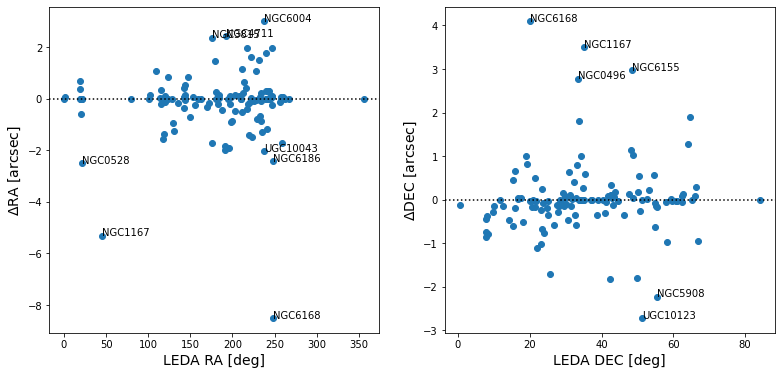

In [10]:
raoff = (leda['rfKinRA']-leda['ledaRA'])*3600*np.cos(np.radians(leda['ledaDE']))
dcoff = (leda['rfKinDecl']-leda['ledaDE'])*3600

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,6))

ax1.scatter(leda['ledaRA'], raoff)
deviates = (abs(raoff)>2)
texts = [ax1.text(leda['ledaRA'][i], raoff[i], leda['Name'][i]) for i in deviates.nonzero()[0]]
ax1.axhline(ls=':', color='k')
ax1.set_xlabel('LEDA RA [deg]',fontsize=14)
ax1.set_ylabel('$\Delta$RA [arcsec]',fontsize=14)

ax2.scatter(leda['ledaDE'], dcoff)
deviates = (abs(dcoff)>2)
texts = [ax2.text(leda['ledaDE'][i], dcoff[i], leda['Name'][i]) for i in deviates.nonzero()[0]]
ax2.axhline(ls=':', color='k')
ax2.set_xlabel('LEDA DEC [deg]',fontsize=14)
ax2.set_ylabel('$\Delta$DEC [arcsec]',fontsize=14)

Text(0, 0.5, 'RINGFIT cos(inc)')

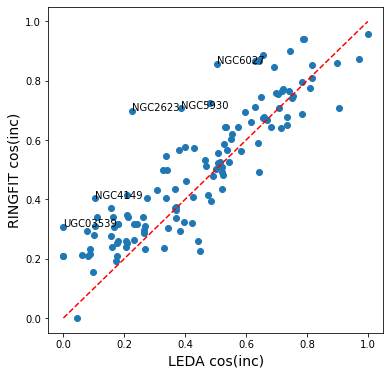

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
ledacosi = np.cos(np.radians(leda['ledaAxIncl']))
rfcosi = np.cos(np.radians(leda['rfInc']))
ax.scatter(ledacosi, rfcosi)
ax.plot([0,1],[0,1],'r--')
deviates = (abs(ledacosi-rfcosi)>0.3)
texts = [plt.text(ledacosi[i], rfcosi[i], leda['Name'][i]) for i in deviates.nonzero()[0]]
plt.xlabel('LEDA cos(inc)',fontsize=14)
plt.ylabel('RINGFIT cos(inc)',fontsize=14)

Text(0, 0.5, 'RINGFIT PA [deg]')

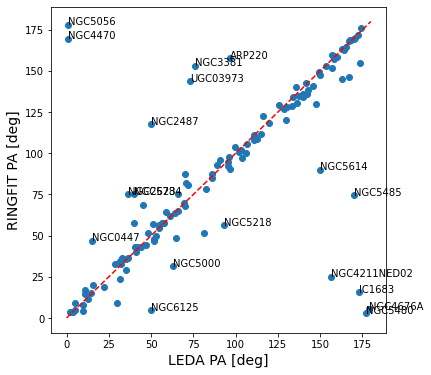

In [12]:
leda['rfPA'][leda['rfPA'] >= 180] -= 180
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(leda['ledaPA'],leda['rfPA'])
deviates = (abs(leda['ledaPA']-leda['rfPA'])>30)
texts = [plt.text(leda['ledaPA'][i], leda['rfPA'][i], leda['Name'][i]) for i in deviates.nonzero()[0]]
ax.plot([0,180],[0,180],'r--')
plt.xlabel('LEDA PA [deg]',fontsize=14)
plt.ylabel('RINGFIT PA [deg]',fontsize=14)